In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Importing the required packages
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('../data/df.csv')
df

aX    aY    aZ    gX    gY    gZ  little  ring  middle  index  thumb  \
0      0.03  0.91  0.40  2.14 -3.23 -0.92     409   458     189    240    199   
1      0.02  0.91  0.40  0.73 -0.79 -1.59     416   455     192    243    195   
2      0.01  0.91  0.41 -1.59 -1.83 -5.62     409   451     190    242    197   
3      0.00  0.89  0.43  3.42 -4.70 -1.10     413   451     190    249    202   
4      0.05  0.91  0.38 -1.46 -1.28 -0.06     410   458     190    243    199   
...     ...   ...   ...   ...   ...   ...     ...   ...     ...    ...    ...   
61983  0.38  0.79  0.47  1.16 -0.73 -2.99     412   397     265    448    358   
61984  0.37  0.81  0.49  9.70 -8.61  9.83     410   397     268    447    360   
61985  0.42  0.79  0.43  3.11 -2.32 -2.20     408   396     267    450    359   
61986  0.42  0.80  0.44  1.65 -3.36 -2.75     410   401     264    454    359   
61987  0.41  0.79  0.44 -1.46 -2.01 -3.85     408   395     267    448    361   

       number  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
61983      29  
61984      29  
61985      29  
61986      29  
61987      29  

[61988 rows x 12 columns]

In [3]:
np.random.seed(42)
index = np.arange(61988)
np.random.shuffle(index)

In [4]:
# 결측치 확인
df.isnull().sum()

#중복 데이터 확인 
df.duplicated().sum()

0

In [5]:
df

aX    aY    aZ    gX    gY    gZ  little  ring  middle  index  thumb  \
0      0.03  0.91  0.40  2.14 -3.23 -0.92     409   458     189    240    199   
1      0.02  0.91  0.40  0.73 -0.79 -1.59     416   455     192    243    195   
2      0.01  0.91  0.41 -1.59 -1.83 -5.62     409   451     190    242    197   
3      0.00  0.89  0.43  3.42 -4.70 -1.10     413   451     190    249    202   
4      0.05  0.91  0.38 -1.46 -1.28 -0.06     410   458     190    243    199   
...     ...   ...   ...   ...   ...   ...     ...   ...     ...    ...    ...   
61983  0.38  0.79  0.47  1.16 -0.73 -2.99     412   397     265    448    358   
61984  0.37  0.81  0.49  9.70 -8.61  9.83     410   397     268    447    360   
61985  0.42  0.79  0.43  3.11 -2.32 -2.20     408   396     267    450    359   
61986  0.42  0.80  0.44  1.65 -3.36 -2.75     410   401     264    454    359   
61987  0.41  0.79  0.44 -1.46 -2.01 -3.85     408   395     267    448    361   

       number  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
61983      29  
61984      29  
61985      29  
61986      29  
61987      29  

[61988 rows x 12 columns]

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 난수를 위한 시작 숫자 고정
np.random.seed(42)
tf.random.set_seed(42)

X = df.drop("number",axis=1)
y = df["number"].copy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
clf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [7]:
cross_val_score_array1 = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
print(cross_val_score_array1)
print("acc/t", np.mean(cross_val_score_array1))
print("acc-stdev/t", cross_val_score_array1.std())

[0.98273915 0.99048234 0.96902726 0.99645104 0.9693499  0.98257784
 0.99193418 0.96789805 0.9588577  0.9375605 ]
acc/t 0.9746877950992001
acc-stdev/t 0.0169802374219477


In [8]:
# get predictions
pred = clf.predict(X_valid)
pred

array([11, 29, 13, ..., 19,  8, 25], dtype=int64)

In [9]:
clf.feature_importances_

array([0.11723834, 0.1246412 , 0.06640441, 0.00192225, 0.00202552,
       0.0019264 , 0.16375472, 0.13183614, 0.14550229, 0.12823641,
       0.11651233])

In [10]:
accuracy_score(y_valid, pred)

0.997418938538474

In [11]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[1731,    0,    0,    0,    0,    1,    1,    0,    0,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1625,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1606,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    4,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1680,    0,    0,    0,    0,    0,    0,    0,
           9,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1610,    0,    0,    0,    0,    0,    0,
           0,   12,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

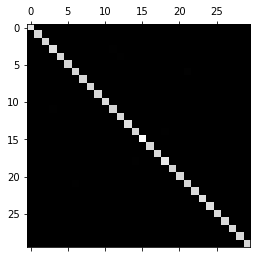

In [12]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [42]:
clf.save("SLTG_model.h5")

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [13]:
import pickle
saved_model = pickle.dumps(clf)

In [14]:
clf_from_pickle = pickle.loads(saved_model)

In [16]:
clf_from_pickle.predict(X)

array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)

In [48]:
import joblib
joblib.dump(clf, 'SLTG_model.h5')
clf = joblib.load('SLTG_model.h5')

clf

RandomForestClassifier(random_state=42)

In [50]:
from tensorflow import keras

model = keras.models.load_model('./SLTG_model.h5', compile = False)

export_path = '../pd'
model.save(export_path, save_format = 'tf')

OSError: Unable to open file (file signature not found)

In [37]:
import tensorflow as tf

saved_model_dir = './STLG_model.h5'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()
os.system("mkdir tf/converted_model_tflit")
open('./model/SLTG.tflite', 'wb').write(tflite_model)

OSError: SavedModel file does not exist at: ./STLG_model.h5\{saved_model.pbtxt|saved_model.pb}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[11]), #입력 특성 11개
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer = keras.optimizers.SGD(1r=1e-3))
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_vaild, y_vaild))
mse_test = model.evaluate(X_test, y_test)

model.compile